# Workshop 6

# Clustering, Plotting, and Simulation

In this workshop, we are moving toward orchestrating each of the pieces we have learned thus far into one, end-to-end, data science project. In this workshop, we will focus mainly on the concepts and less on the details of the underlying processes. Where applicable, we will provide references to external material for additional reading. This workshop focuses on Clustering, Plotting, and Simulation. For Clustering, we will be implementing a K-means algorithm. A detailed discussion on K-means can be found at (wikipedia)[https://en.wikipedia.org/wiki/K-means_clustering]. For plotting, we will visualize the clusters we are simulating using (Seaborn)[https://seaborn.pydata.org/], a statistical data visualization library built using (matplotlib)[https://matplotlib.org/]. For simulation, we will use built in NumPy functionality to generate distributions of our choosing.

We will go out of order in this workshop to show how we can go from simulating synthetic data to applying machine learning algorithms. 

## Introduction to Simulation

Simulation is a vital part of machine learning today. Many problems which cannot be analytically solved can be approximately solved using simulation techniques. (Monte Carlo methods)[https://en.wikipedia.org/wiki/Monte_Carlo_method] are one type of simulation technique which involves a random component to generate numerical results. This typically involves simulating data from a known distribution and computing statistics on the results. For our problem, we are interested in generating clusters of data. There are many different distributions we could use to simulate data from; we will use Normal distributions for simplicity. 

For this, we will leverage the (Numpy Random submodule)[https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html] which has many built-in sampling functions. We are specifically interested in the (_normal_ function)[https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html#numpy.random.normal]. To begin, let's import the general NumPy library as the shortened name _np_ in addition to the specific function we want from the Random submodule. Using this, we can provide the location (_loc_) or mean parameter, the standard deviation (_scale_), and the number of samples (_size_) we want to generate. 


In [3]:
import numpy as np
from numpy.random import normal

normal(loc=5, scale=25, size=20)

array([ 13.73071538,  35.61748744,   6.65626419,  12.59486993,
        -3.27771214,  50.59511261, -12.22276381,  17.67431829,
       -20.51496271,  27.41339056,   7.18544282,  27.29259035,
        52.49054116, -47.64641138, -17.57475366,  64.1773412 ,
        10.18917366, -36.24627013,  11.86616745,   7.55163777])


As a result, we get a NumPy array with our results contained therein. We can save the results of these to variable names. For plotting practice, let's define two different clusters representing an $x$ and $y$ axis with different location and scale parameters.


In [72]:
x_axis = normal(loc=-5, scale=2, size=100)
y_axis = normal(loc=3.5, scale=5, size=100)

## Introduction to Plotting

For plotting, we will be using the (Seaborn visualization library)[https://seaborn.pydata.org/]. Many of you may have already seen a preview to this library as part of our choose your own adventure workshop. The plot we are interested in using the built-in (scatterplot)[https://seaborn.pydata.org/examples/scatterplot_sizes.html] functionality. Visualization can be tedious depending on the library used. For this workshop, we will provide guiding code examples. The (Seaborn Gallery)[https://seaborn.pydata.org/examples/index.html] provides an excellent starting point for creating visually pleasing graphs for a variety of use cases.

In order to plot the $x$ and $y$ axes we simulated earlier, we can use the scatterplot function with mostly default options. In order to import the library and get the data to render, we need to do a little extra work. If you are using a Jupyter notebook, place the line _%matplotlib inline_ at the beginning of the code chunk where a plot is called. If you are using atom or running from the command line, an additional import and function call will be needed. If you are using atom, use the following import line to get the _show()_ function: _import matplotlib.pyplot as plt_. Next, run the function _plt.show()_ at the end of the python script to visualize the data.  When importing the Seaborn library, we will use a process similar to when we imported NumPy and use the shortened name _sns_. Finally, we call the function _sns.set()_ immediately after importing. This sets the Seaborn plot defaults to more visually appealing background and grid lines.

TODO: Provide Function for plotting clusters

TODO: Show Ways to Simulate Data (Scipy Random)
TODO: Plot Simulated Data
TODO: Show how Adjusting Cluster Centers Changes Plots



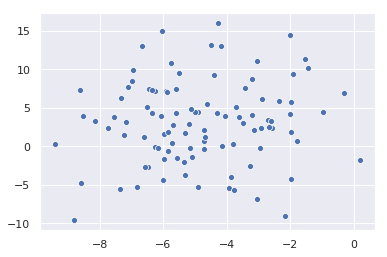

In [73]:
%matplotlib inline
import seaborn as sns
sns.set()

ax = sns.scatterplot(x=x_axis, y=y_axis)

Now that we know how to simulate and now plot data for a single cluster, we need to move beyond plotting just one cluster to multiple clusters. Let's simulate another cluster using the same process as before but using different variable names.

In [74]:
x_axis2 = normal(loc=5, scale=5, size=100)
y_axis2 = normal(loc=5, scale=5, size=100)

Now, we simply need to use the plotting function twice in order to overlay both sets of points.

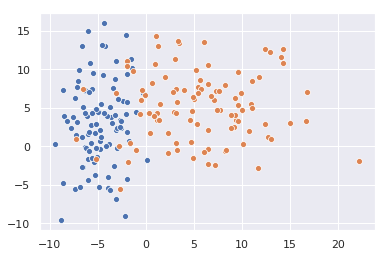

In [75]:
ax = sns.scatterplot(x=x_axis, y=y_axis)
ax2 = sns.scatterplot(x=x_axis2, y=y_axis2)

Now we're getting into interesting visualizations. We can repeat this for as many different clusters as we would like using the same ideas discussed here. Now let's move toward our algorithm of the day: K-means.

## Introduction to K-Means

One of the most popular machine learning algorithms available is [K-means](https://en.wikipedia.org/wiki/K-means_clustering). K-means is an algorithm which defines $K$ separate cluster centers to be defined by the mean of the points within that clusters. Cluster centers may also be referred to as centroids. K-means works using a (two-stage process)[https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm]. The first stage is to assign clusters based on the locations of the centroids. Specifically, we want to assign points to the nearest cluster center possible. After assigning points, the next step is to compute the distance from each of the points in our dataset to each of the centroids. We will then repeat the second part again until one of three conditions are met: 1. a specific number of iterations has been completed, 2. no points have changed cluster centers within an iteration, 3. a specific error tolerance has been met. For this workshop, we will implement the first option as part of the application problem with the second option being a bonus question.

In summary, K-means consists of two steps:

1. **Assignment Step:** Assign each of the points in the dataset to the nearest cluster center 
2. **Update Step:** Adjust cluster centers to mean value of points assigned

We have not discussed two things yet for K-means: how do we pick the initial cluster centers and how do we choose how many clusters to use? The first question is far easier than the second. Since we expect the algorithm to converge fairly quickly, it works well to randomly assign points in our dataset to random clusters initially. The second question is more difficult and uncovers more of the art of machine learning. There are very good [answers](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) involving some hand-waving and graphics. For this workshop, we will ask you to experiment and choose the number of clusters which _visually_ provides the best fit to the data. 

In order to plot the results of K-means, we need to be able to assign color to specific points in our dataset. This can be done in two ways. The first way is to keep the list of point in each cluster in separate arrays. Using this method, we can plot using repeated calls to the scatterplot function. Another, potentially easier way is to have a separate vector which has a corresponding cluster "label" for each point which will be equal to the number of points in our entire dataset. An example of the first method is given above. An example of the second method is shown below. Point assignments are drawn from a Bernoulli distribution with $p=0.5$. We can then provide the optional arguement _hue_ to the scatterplot function to assign clusters.   

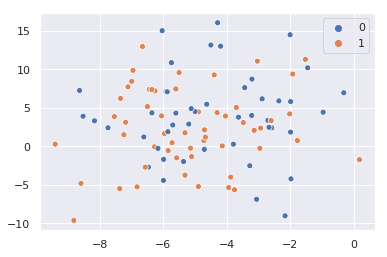

In [76]:
# Method 2 -- Using the two clusters from

from numpy.random import binomial

point_assignments = binomial(1, 0.5, 100)
ax = sns.scatterplot(x = x_axis, y = y_axis, hue=point_assignments)

In [85]:
from numpy.linalg import norm

def k_means(data, number_of_clusters, iterations):
    
    # Randomly assign points to a cluster center for an initial guess
    cluster_labels = np.random.randint(0, number_of_clusters, size=data.shape[0])
    
    # Generate a vector of cluster centers of the shape we need
    cluster_centers = np.zeros((number_of_clusters, 2))
    
    # Create a for loop to operate a specific number of iterations
    for _ in range(iterations):
        
        # Perform the first step of K-means -- Update Step
        # Compute the mean of each of the points within a specific cluster
        
        for cluster_center_index in range(number_of_clusters):
            cluster_centers[cluster_center_index] = np.mean(data[cluster_center_index == cluster_labels], axis=0)
            
        # Perform the second step of K-means -- Assignment Step
        # Assign each point to the nearest cluster center
        
        for data_point_index in range(data.shape[0]):
            
            # Save best_so_far as the minimum distance seen for that data point 
            # to each of the cluster centers
            best_so_far = 1000000000
            
            # Save the index to the cluster center list
            best_so_far_index = number_of_clusters 
            
            # Check all cluster centers and update best_so_far and best_so_far_index only if
            # better value is observed
            for cluster_center_index in range(number_of_clusters):
                if norm(cluster_centers[cluster_center_index] - data[data_point_index]) < best_so_far:
                    best_so_far = norm(cluster_centers[cluster_center_index] - data[data_point_index])
                    best_so_far_index = cluster_center_index
                    
            # Assign the best_so_far_index to the associated cluster_center index
            cluster_labels[data_point_index] = best_so_far_index
        
    # return both cluster labels (which cluster data points belong to) and
    # cluster centers (the centers of those clusters)
    
    return cluster_labels, cluster_centers
        
labels, centers = k_means(sample_points, 3, 200)
sns.scatterplot(x = x_axis, y = y_axis, hue=labels)
np.mean(sample_points, axis=0)

ValueError: arrays must all be same length

array([-3.63350065, -2.02290831])

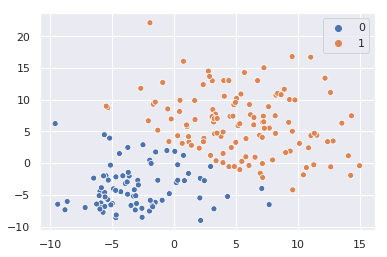

In [84]:
from sklearn.cluster import KMeans

sample_points = np.array([[x_axis, y_axis],[x_axis2, y_axis2]]).reshape((200,2))
kmeans = KMeans(n_clusters=2)
point_assignments = kmeans.fit_predict(sample_points)
sns.scatterplot(x = sample_points[:,0], y = sample_points[:,1], hue=point_assignments)

### Extra Prep

TODO: Prepare Solution
TODO: Prepare Dataset for testing
TODO: Prepare Tiers/Application Problem Prompt
TODO: Show how K-means overfits
TODO: Show Starter/Skeleton Code